## About Dataset
Using the Columns :
* precipitation
* temp_max
* temp_min
* wind

We are going to predict the weather condition :
* drizzle
* rain
* sun
* snow
* fog

Data can be found at: https://www.kaggle.com/datasets/ananthr1/weather-prediction

#### Importing Data

In [1]:
! gdown 1NEqG2-ezn694NwiyqxlxvZLPYr2EWtlY

Downloading...
From: https://drive.google.com/uc?id=1NEqG2-ezn694NwiyqxlxvZLPYr2EWtlY
To: /content/weather.zip
100% 11.8k/11.8k [00:00<00:00, 26.1MB/s]


#### Unzipping File


In [2]:
import zipfile
zip_ref = zipfile.ZipFile('weather.zip')
zip_ref.extractall()
zip_ref.close()

#### Importing Frameworks


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Exploration

In [4]:
data = pd.read_csv("/content/seattle-weather.csv")
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [5]:
# Checking length of dataframe
len(data)

1461

In [6]:
# Checking for missing values
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [7]:
# Checking data types
data.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

#### Data Visualization

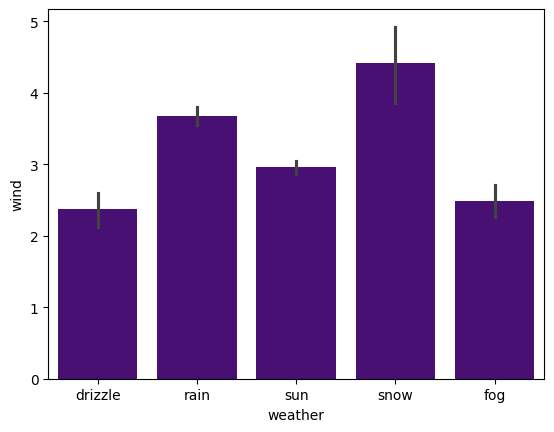

In [8]:
# Plotting weather based on wind
sns.barplot(x = 'weather', y = 'wind', data = data, color='indigo');

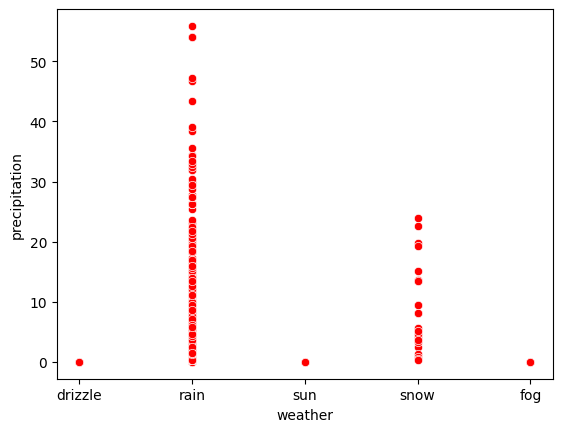

In [9]:
# Plotting weather based on percipitation
sns.scatterplot(x = 'weather', y = 'precipitation', data = data, color='red');

<Axes: xlabel='weather', ylabel='temp_max'>

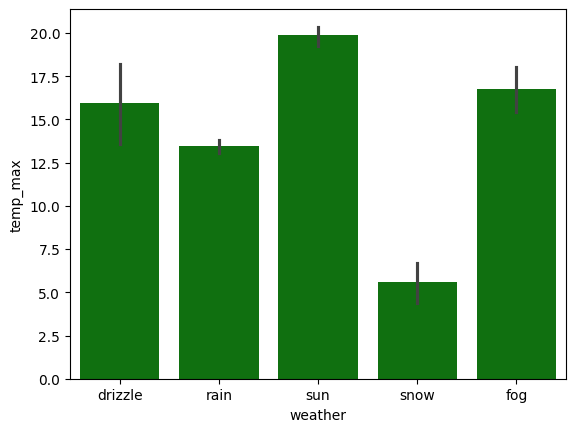

In [10]:
# Plotting weather by max_temp
sns.barplot(x = 'weather', y = 'temp_max', data = data, color='green')

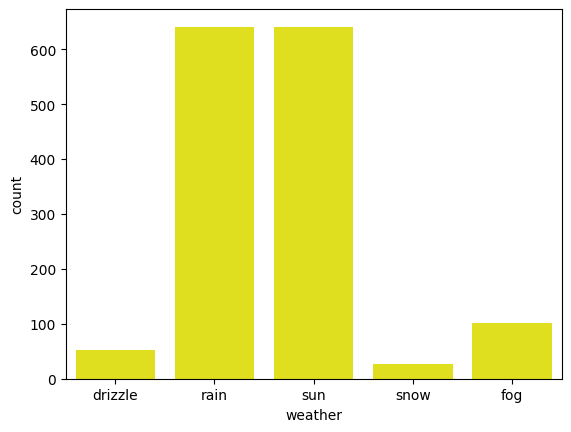

In [11]:
# Plotting distribution of weather
sns.countplot(x = 'weather', data = data, color='yellow');

### Data Preprocessing

In [12]:
# Converting non-numeric data to numeric data types
data['weather'] = data['weather'].astype('category')
data['weather'] = data['weather'].cat.codes

In [13]:
# Rechecking DataFrame
data.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather             int8
dtype: object

In [14]:
# Dropping the date column
data = data.drop(['date'], axis=1)

In [15]:
# Splitting data into features & labels
x = data.drop(['weather'], axis=1)
y = data['weather']

len(x), len(y)

(1461, 1461)

In [16]:
# Splitting data into training & test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [17]:
x_train.shape, y_train.shape

((1168, 4), (1168,))

### Modelling

# Model Evaluation

### Using a Random Forest Classifier model

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(x_train, y_train)
rf = clf.score(x_test, y_test)

In [23]:
print(f"Random Forest Classifier Result: \n {rf}")

Random Forest Classifier Result: 
 0.8191126279863481


### Evaluating on the Random Forest Classifier

In [19]:
y_preds = clf.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.17      0.11      0.13         9
           1       0.29      0.08      0.12        25
           2       0.92      0.92      0.92       120
           3       0.50      0.25      0.33         8
           4       0.77      0.92      0.84       131

    accuracy                           0.80       293
   macro avg       0.53      0.45      0.47       293
weighted avg       0.76      0.80      0.77       293



### Modelling 2: Buidling a KNN model

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_model = knn.score(x_test, y_test)
print(f"K Nearest Neighbor Score: \n {knn_model}")

K Nearest Neighbor Score: 
 0.7781569965870307


### Evaluating the model

In [36]:
import warnings
warnings.filterwarnings('ignore')

y_pred = knn.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.11      0.17         9
           1       0.36      0.20      0.26        25
           2       0.88      0.88      0.88       120
           3       0.00      0.00      0.00         8
           4       0.74      0.89      0.81       131

    accuracy                           0.78       293
   macro avg       0.46      0.42      0.42       293
weighted avg       0.73      0.78      0.75       293



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Modelling 3: Building a Naive Bayes Model

In [31]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
nb_model = nb.score(x_test, y_test)
print(f"Naive Bayes Score: \n {nb_model}")

Naive Bayes Score: 
 0.8293515358361775


### Evaluating the Niave Bayes Model

In [34]:
import warnings
warnings.filterwarnings('ignore')

y_pred = nb.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        25
           2       0.96      0.91      0.94       120
           3       0.57      0.50      0.53         8
           4       0.76      0.99      0.86       131

    accuracy                           0.83       293
   macro avg       0.46      0.48      0.47       293
weighted avg       0.75      0.83      0.78       293



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Visualizing Model Results

In [37]:
results = pd.DataFrame({
    'Model': ['Random Forest Classifier', 'KNN', 'Naive Bayes'],
    'Score': [rf, knn_model, nb_model]
})

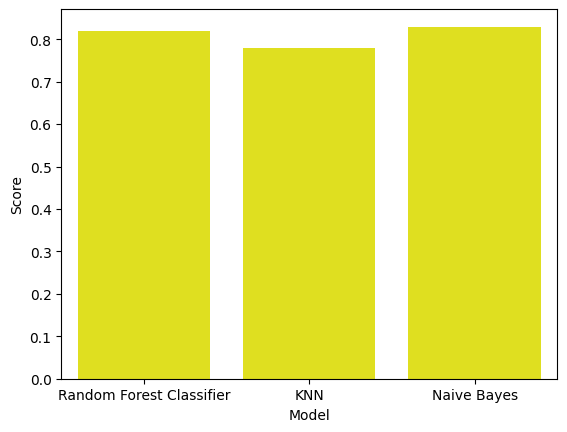

In [40]:
# Plotting results
sns.barplot(x = 'Model', y = 'Score', data = results, color='yellow');